#### XGBoost docs can be found here: https://xgboost.readthedocs.io/en/stable/

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn import linear_model

from xgboost import plot_tree

#### This dataframe can be found online at https://github.com/andreweatherman/CS216/blob/main/transfer_player_season_data.csv

In [2]:
df = pd.read_csv('transfer_player_season_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'player', 'pos', 'exp', 'num', 'hgt', 'inches', 'team',
       'conf', 'g', 'min', 'mpg', 'ppg', 'oreb', 'dreb', 'rpg', 'apg', 'tov',
       'ast_to', 'spg', 'bpg', 'usg', 'ortg', 'efg', 'ts', 'year', 'id', 'fgm',
       'ftm', 'fta', 'ft_pct', 'two_m', 'two_a', 'two_pct', 'three_m',
       'three_a', 'three_pct', 'dunk_m', 'dunk_a', 'dunk_pct', 'rim_m',
       'rim_a', 'rim_pct', 'mid_m', 'mid_a', 'mid_pct', 'porpag', 'dporpag',
       'adj_oe', 'drtg', 'adj_de', 'stops', 'obpm', 'dbpm', 'bpm', 'oreb_rate',
       'dreb_rate', 'ast', 'to', 'blk', 'stl', 'ftr', 'pfr', 'rec', 'pick',
       'fga', 'fg_pct'],
      dtype='object')

## Analysis of dataframe columns

In [4]:
'''
'Unnamed: 0' - byproduct of csv conversion. DROP
'player' = player name. DROP
'pos' = player position on the court. OHE
'exp' = year in school. ORDINAL
'num' = jersey number. DROP
'hgt' = height in format X'-X''. DROP
'inches' = height in inches. KEEP
'team' = team name. DROP
'conf' = conference name. OHE
'g' - 'fg_pct' = numeric. KEEP
'''

df = df.drop(['Unnamed: 0', 'player', 'num', 'hgt', 'team'], axis=1)

for col in ['pos', 'exp', 'conf']:
    df[col] = df[col].astype('category')

## Split data into X and y applying OHE and OE

In [5]:
X = df.drop('ortg', axis=1)

y = df['ortg']

## Split data intotrain and test sets

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3)

## Load train, test data sets into DMatrices


In [7]:
dtrain = xgb.DMatrix(train_X, train_y, enable_categorical=True)
dtest = xgb.DMatrix(test_X, test_y, enable_categorical=True)

## Set parameters and metrics for evaluation

In [8]:
# From hypterparameter_tuning.ipynb:
param = {'eta': 0.1, 
         'max_depth': 4, 
         'min_child_weight': 1,
         'n_jobs': 500,
         'objective': 'reg:squarederror'}

watchlist = [(dtest, "eval"), (dtrain, "train")]

## Train the model (this cell takes about a minute to run)

In [9]:
model = xgb.train(param, dtrain, num_boost_round=250, evals=watchlist)

[0]	eval-rmse:87.85166	train-rmse:87.38849
[1]	eval-rmse:79.17693	train-rmse:78.71540
[2]	eval-rmse:71.38123	train-rmse:70.90693
[3]	eval-rmse:64.35441	train-rmse:63.88390
[4]	eval-rmse:58.03001	train-rmse:57.56082
[5]	eval-rmse:52.32586	train-rmse:51.86817
[6]	eval-rmse:47.21615	train-rmse:46.74766
[7]	eval-rmse:42.59000	train-rmse:42.13588
[8]	eval-rmse:38.43786	train-rmse:37.98838
[9]	eval-rmse:34.69481	train-rmse:34.25568
[10]	eval-rmse:31.33019	train-rmse:30.89476
[11]	eval-rmse:28.31090	train-rmse:27.87357
[12]	eval-rmse:25.60151	train-rmse:25.15667
[13]	eval-rmse:23.16526	train-rmse:22.71279
[14]	eval-rmse:20.96883	train-rmse:20.51146
[15]	eval-rmse:18.99085	train-rmse:18.53492
[16]	eval-rmse:17.22280	train-rmse:16.75885
[17]	eval-rmse:15.63907	train-rmse:15.16177
[18]	eval-rmse:14.21535	train-rmse:13.72686
[19]	eval-rmse:12.93782	train-rmse:12.43574
[20]	eval-rmse:11.79544	train-rmse:11.28088
[21]	eval-rmse:10.78285	train-rmse:10.24870
[22]	eval-rmse:9.87468	train-rmse:9.32467


[193]	eval-rmse:2.10236	train-rmse:1.20642
[194]	eval-rmse:2.10190	train-rmse:1.20454
[195]	eval-rmse:2.10031	train-rmse:1.20244
[196]	eval-rmse:2.09773	train-rmse:1.19847
[197]	eval-rmse:2.09705	train-rmse:1.19632
[198]	eval-rmse:2.09626	train-rmse:1.19382
[199]	eval-rmse:2.09585	train-rmse:1.19234
[200]	eval-rmse:2.09579	train-rmse:1.19120
[201]	eval-rmse:2.09498	train-rmse:1.18898
[202]	eval-rmse:2.09388	train-rmse:1.18658
[203]	eval-rmse:2.09288	train-rmse:1.18500
[204]	eval-rmse:2.09156	train-rmse:1.18276
[205]	eval-rmse:2.08856	train-rmse:1.17981
[206]	eval-rmse:2.08841	train-rmse:1.17835
[207]	eval-rmse:2.08800	train-rmse:1.17724
[208]	eval-rmse:2.08727	train-rmse:1.17656
[209]	eval-rmse:2.08677	train-rmse:1.17537
[210]	eval-rmse:2.08628	train-rmse:1.17395
[211]	eval-rmse:2.08545	train-rmse:1.17224
[212]	eval-rmse:2.08346	train-rmse:1.16912
[213]	eval-rmse:2.08327	train-rmse:1.16707
[214]	eval-rmse:2.08271	train-rmse:1.16578
[215]	eval-rmse:2.08179	train-rmse:1.16389
[216]	eval-

## Run the testing data through the model

In [10]:
pred_y = model.predict(dtest)

## Mean squared error of testing data

In [11]:
mse = np.square(np.subtract(pred_y,test_y)).mean()
print(np.round(mse, 4))

4.1959


## Plot 5 most important features of model

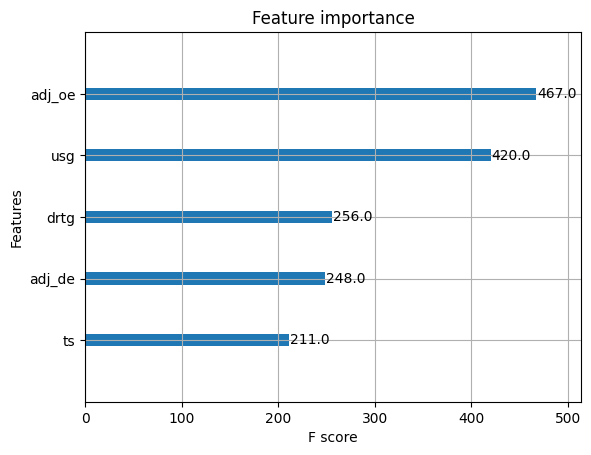

In [12]:
xgb.plot_importance(model, max_num_features=5);
#plt.savefig('importance.pdf', dpi=900)
plt.show()

## Plot XGBoost tree model

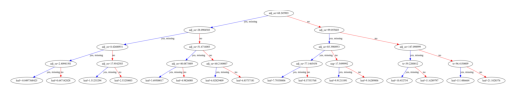

In [13]:
xgb.plot_tree(model, num_trees=0);
#plt.savefig('xgb-tree.pdf', dpi=900)
plt.show()

## Creating baseline models to compare with XGBoost

In [14]:
df.dropna(inplace=True)

lin_X = df[['g', 'min', 'mpg', 'ppg', 'oreb', 'dreb', 'rpg', 'apg', 'tov',
       'ast_to', 'spg', 'bpg', 'usg', 'efg', 'ts', 'year', 'id', 'fgm',
       'ftm', 'fta', 'ft_pct', 'two_m', 'two_a', 'two_pct', 'three_m',
       'three_a', 'three_pct', 'dunk_m', 'dunk_a', 'dunk_pct', 'rim_m',
       'rim_a', 'rim_pct', 'mid_m', 'mid_a', 'mid_pct', 'porpag', 'dporpag',
       'adj_oe', 'drtg', 'adj_de', 'stops', 'obpm', 'dbpm', 'bpm', 'oreb_rate',
       'dreb_rate', 'ast', 'to', 'blk', 'stl', 'ftr', 'pfr', 'rec', 'pick',
       'fga', 'fg_pct']]
lin_y = df['ortg']

lin_train_X, lin_test_X, lin_train_y, lin_test_y = train_test_split(lin_X, lin_y, 
                                                                    test_size = 0.3)

In [15]:
baseline_mean = train_y.mean()
baseline_median = train_y.median()

reg = linear_model.LinearRegression()
reg.fit(lin_train_X, lin_train_y)

y_pred = reg.predict(lin_test_X)

## Evaluating baseline models with MSE

In [16]:
mse_mean = np.square(np.subtract(baseline_mean ,test_y)).mean()
print('Baseline MSE for train_y mean:', np.round(mse_mean, 4))
mse_med = np.square(np.subtract(baseline_median ,test_y)).mean()
print('Baseline MSE for train_y median:', np.round(mse_med, 4))
lin_mse = np.square(np.subtract(y_pred ,lin_test_y)).mean()
print('Baseline MSE for linear regression:', np.round(lin_mse, 4))

Baseline MSE for train_y mean: 544.4764
Baseline MSE for train_y median: 551.9898
Baseline MSE for linear regression: 35.4896


## Difference in XGBoost and baseline MSE

In [17]:
print('The difference between MSE of XGB and baseline mean is:', 
      np.round(mse_mean - mse, 4))
print('The difference between MSE of XGB and baseline median is:', 
      np.round(mse_med - mse, 4))
print('The difference between MSE of XGB and linear regression is:', 
      np.round(lin_mse - mse, 4))

The difference between MSE of XGB and baseline mean is: 540.2805
The difference between MSE of XGB and baseline median is: 547.7938
The difference between MSE of XGB and linear regression is: 31.2936


## Save model

In [18]:
#model.save_model('0001.model')
#model.dump_model('featmap.txt')